In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn import impute
from sklearn import ensemble
from sklearn import metrics
from sklearn import neural_network
import warnings
warnings.filterwarnings('ignore')

In [2]:
# /kaggle/input/pmldl-week-1-test-regression-competition/
train_data = pd.read_csv('/kaggle/input/pmldl-week-1-test-regression-competition/train.csv',sep=';')

train_data.head()

,Course Grade (Real),Assignment: In-class participation,Assignment: Assignment 1,Assignment: Midterm
0,100,5,100,26
1,73,1.25,98,12
2,78,-,96,14
3,100,0,100,20
4,70,0,84,26


## Preprocessing

Please note that all the features have their own scales. Also some of them have missing values. Thus, you should apply Scaler and Imputer on the features and Scaler on labels.

In [3]:
def perform_transform(df):
    res = df.replace({'-': 0}).astype('float64')
    res['Assessments'] = res['Assignment: In-class participation']\
                       + res['Assignment: Midterm']\
                       + res['Assignment: Assignment 1'] * 0.3
    res['Course Grade (Residual)'] = res['Course Grade (Real)']\
                                   - res['Assignment: In-class participation']\
                                   - res['Assignment: Midterm']\
                                   - res['Assignment: Assignment 1'] * 0.3
    return res

In [4]:
# imputing happens here
train_data = perform_transform(train_data)

In [5]:
train_data

,Course Grade (Real),Assignment: In-class participation,Assignment: Assignment 1,Assignment: Midterm,Assessments,Course Grade (Residual)
0,100.0,5.00,100.0,26.0,61.00,39.00
1,73.0,1.25,98.0,12.0,42.65,30.35
2,78.0,0.00,96.0,14.0,42.80,35.20
3,100.0,0.00,100.0,20.0,50.00,50.00
4,70.0,0.00,84.0,26.0,51.20,18.80
...,...,...,...,...,...,...
239,51.0,3.00,85.0,14.0,42.50,8.50
240,0.0,0.00,0.0,0.0,0.00,0.00
241,100.0,0.42,93.0,28.0,56.32,43.68
242,83.0,3.00,98.0,18.0,50.40,32.60


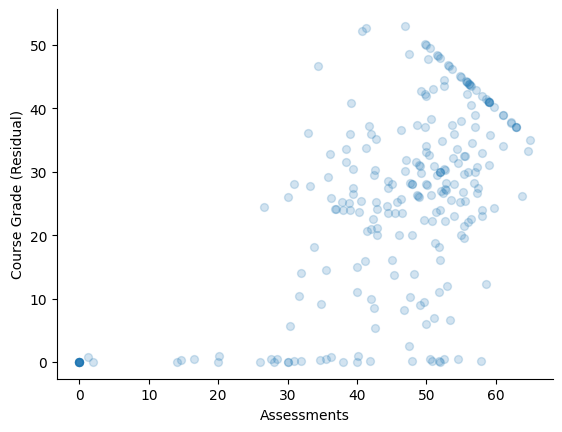

In [6]:
# @title Assessments vs Course Grade (Residual)

from matplotlib import pyplot as plt
train_data.plot(kind='scatter', x='Assessments', y='Course Grade (Residual)', s=32, alpha=.2)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
y = train_data['Course Grade (Residual)']
delta = train_data['Assessments']
minimum, maximum = min(train_data['Course Grade (Real)']), max(train_data['Course Grade (Real)'])

# Write your src_code here
# label_scaler = preprocessing.MinMaxScaler()
y = ((y - minimum) / maximum).to_numpy()
delta = ((delta - minimum) / maximum).to_numpy()

X = train_data.drop(['Course Grade (Real)', 'Course Grade (Residual)', 'Assessments'], axis=1)
# Write your src_code here - do some preprocessing
# regressor_imputer = impute.SimpleImputer(missing_values='-', strategy='constant', fill_value=0)
# X = regressor_imputer.fit_transform(X)

regressor_scaler = preprocessing.MinMaxScaler()
X = regressor_scaler.fit_transform(X)


### Model
Implement any appropriate regression  ML model you like. Consider the number of features and data points when chose a model.

In [8]:
model = sklearn.neural_network.MLPRegressor()
model.fit(X, y)

MLPRegressor()

In [9]:
y_pred = model.predict(X)

### Inference
Run you trained model on `test` split


In [10]:
test_data = pd.read_csv('/kaggle/input/pmldl-week-1-test-regression-competition/test.csv', sep=';')
test_data.head()

,Assignment: In-class participation,Assignment: Assignment 1,Assignment: Midterm
0,3,100.0,14
1,-,100.0,18
2,1,100.0,16
3,1,100.0,16
4,-,61.0,20


In [11]:
# Write your src_code here - don't forget to apply the same transformation on test data
preproc_test = test_data.replace({'-': 0}).astype('float64')
delta_test = preproc_test['Assignment: Assignment 1'] * 0.3 + preproc_test['Assignment: In-class participation'] + preproc_test['Assignment: Midterm']
delta_test = delta_test.to_numpy().flatten()
preproc_test = regressor_scaler.transform(preproc_test)

predictions = model.predict(preproc_test)

### Save model predictions
Save model predictions to `submission.csv` and submit to competition

In [12]:
predictions = np.minimum(np.maximum(predictions * maximum + minimum + delta_test, 0), 100)
predictions_to_go = predictions.reshape(-1, 1)
preds = pd.DataFrame(predictions_to_go, columns=['Course Grade (Real)'])
# Insert ID column for Kaggle
preds.insert(0, 'ID', range(0, len(preds)))

In [13]:
preds

,ID,Course Grade (Real)
0,0,75.880866
1,1,71.527440
2,2,73.330862
3,3,73.330862
4,4,56.493169
5,5,57.933867
6,6,81.616655
7,7,73.219237
8,8,100.000000
9,9,82.214314


In [14]:
preds.to_csv('submission.csv', index=None)